In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
# read data
df = pd.read_csv("./HW1_data.csv")

In [3]:
# print(df)

In [4]:
# create a new df to store the reorder data
new_df = pd.DataFrame(columns = ["Name"]+list(set(df['1'])))
new_df['Name'] = list(set(df['0']))

print(new_df.shape)


(50, 7)


In [5]:
def print_test():
    name = "Sofia"
    per_df = df[df['0'] == name].reset_index(drop=True)
    print(per_df)
print_test()

       0       1    2
0  Sofia     Age   58
1  Sofia  Weight   59
2  Sofia     Sex    F
3  Sofia      HR   79
4  Sofia      BP  131
5  Sofia  Height  171


In [6]:
# iter over each person
for name in new_df['Name']:
    # getting each person's information
    # with ['0']-> Name, ['1']-> Column, ['2']-> Value
    per_df = df[df['0'] == name].reset_index(drop=True)

    # getting row's index
    num = new_df.index[new_df['Name'] == name]
    
    # iter over each column {Weight, HR, ...}
    for ii in range(per_df.shape[0]):
        col_name = per_df['1'][ii]
        new_df.loc[num, col_name] = per_df['2'][ii]
    
print(new_df)

         Name   HR Weight Age Sex   BP Height
0      Amelia  NaN     49  66   F  119    151
1     Madison   80    NaN  74   F  NaN    NaN
2       Mason  NaN     76  37   M  134    186
3        Ella   80     67  10   F  137    168
4      Camila  NaN     46  44   F  134    166
5   Elizabeth   84     56  43   F   98    163
6       Henry   81     63  70   M  130    179
7     Lillian   64     59  66   F   91    158
8    Victoria   65    NaN  62   F   96    NaN
9       Aiden   93     69  38   M  136    166
10      Ethan   86     61  12   M  103    167
11    Matthew   85     70  69   M  128    166
12      Emily   84     46  52   F   98    166
13    Abigail   87     56  46   F  119    161
14   Scarlett   74     64  60   F  107    154
15     Daniel   80     72  37   M  131    165
16  Alexander   66     62  43   M  124    171
17       Nora   82     59  48   F   93    153
18       Aria   81     59  55   F  127    170
19       Noah   77     68  30   M  NaN    181
20     Joseph  NaN     70  42   M 

In [7]:
data = new_df.fillna(0)

# setting data type
data = data.astype({
    "Height": int,
    "Age": int,
    "Weight": int,
    "BP": int,
    "HR": int
    })
avg = {}
max_idx = {}

# iter over each column
for col in data.columns:

    # skip these 2 cols
    if col == "Name" or col == "Sex":
        continue

    # counting number of valid value, which is not "0".
    valid_number = data.shape[0] - (data[col] == 0).sum()

    # calculate the avg of the column
    avg[col] = data[col].sum()/valid_number

    # record the row index with max value
    max_idx[col] = data[col].idxmax()

avg['Name'] = "AVG"
avg['Sex'] = "N"

# adding the AVG data to DF
data = pd.concat([data, pd.DataFrame(avg, index=[0])], ignore_index=True)


print("The person with Max value:")
# iter over each column
for col in data.columns:
    if col == "Name" or col == "Sex":
        continue
    print(f"{col}: {data['Name'][max_idx[col]]} -> {data[col][max_idx[col]]} ")


The person with Max value:
HR: Liam -> 94.0 
Weight: Mason -> 76.0 
Age: Madison -> 74.0 
BP: Lucas -> 148.0 
Height: Mason -> 186.0 


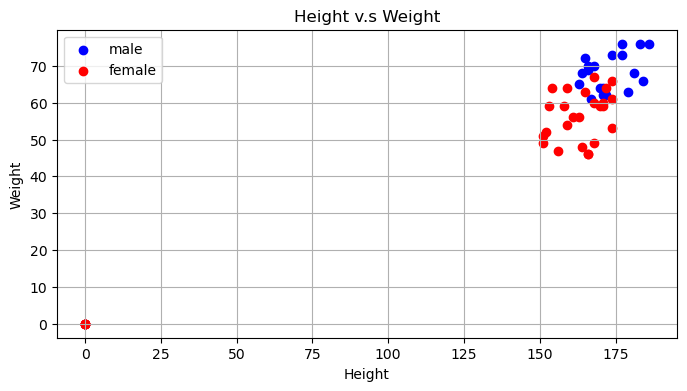

In [8]:
df = data.copy().drop(len(data)-1)

# seperating data
male = df[df['Sex'] == 'M']
female = df[df['Sex'] == 'F']

# formatting
plt.figure(figsize=(8,4))

# enter data
plt.scatter(male['Height'], male['Weight'], c='blue', label='male')
plt.scatter(female['Height'], female['Weight'], c='red', label='female')

# labeling
plt.title('Height v.s Weight')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.legend()

# printing
plt.grid()
plt.show()

41-50    12
61-70    12
31-40     9
51-60     6
11-20     5
21-30     4
1-10      1
71-80     1
Name: Age, dtype: int64


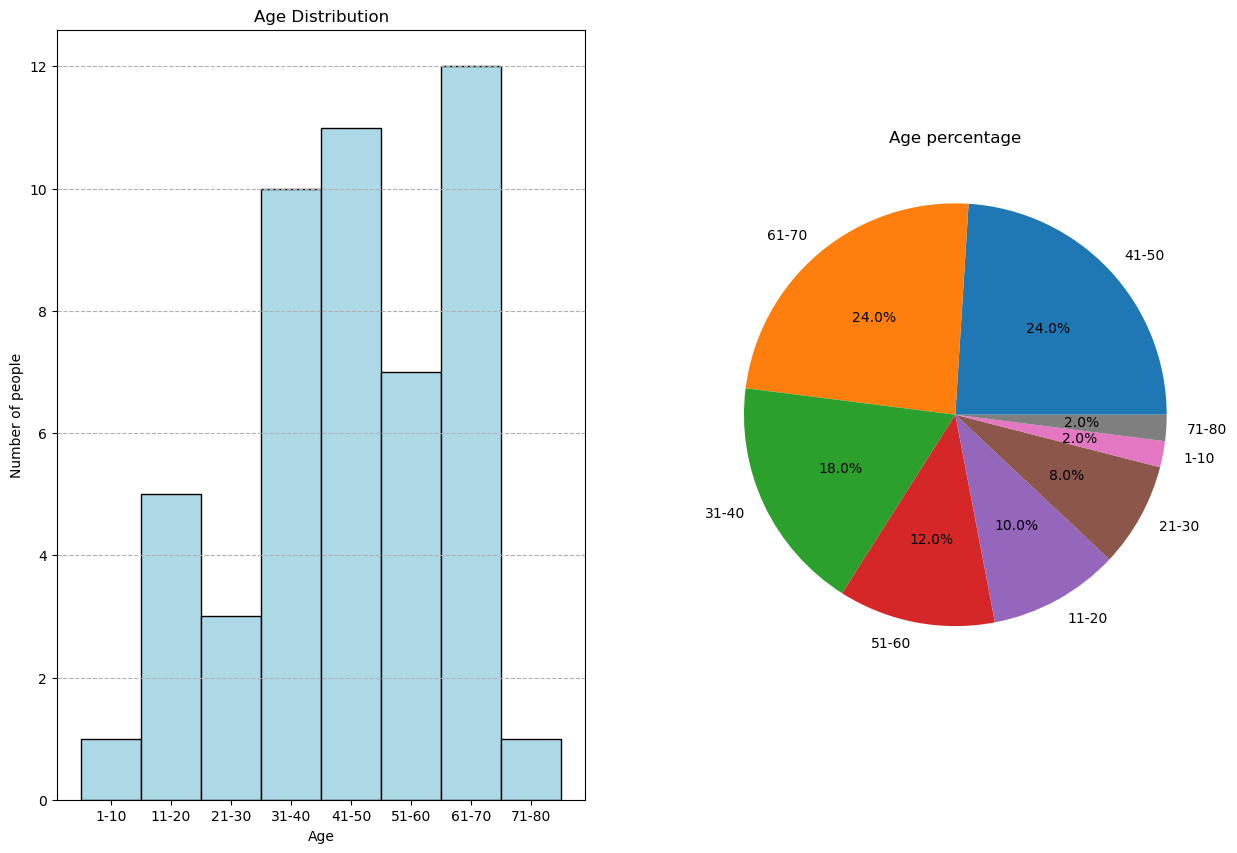

In [9]:
df = data.copy().drop( len(data) - 1)
plt.figure(figsize=(15,10))

# the way data seperate
age_bin = [ii* 10+1 for ii in range(9)]
age_labels = ['1-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80']

age_group = pd.cut(df['Age'], bins = age_bin, labels=age_labels)
age_count = age_group.value_counts()
print(age_count)
# print(age_group)
# draw histograph
plt.subplot(1,2,1)
plt.hist(df['Age'],bins=age_bin, edgecolor = "black", color= "lightblue")
plt.grid(axis='y', linestyle="--")

# labeling
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Number of people")
plt.xticks([ii* 10+6 for ii in range(8)],age_labels)

plt.subplot(1,2,2)
plt.pie(age_count, labels= age_count.index,autopct="%1.1f%%")
plt.title("Age percentage")


# # print plot
plt.show()

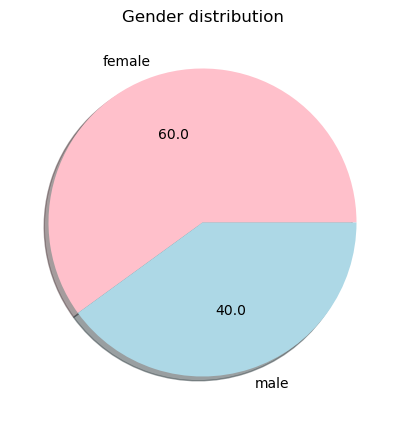

In [12]:
df = data.copy().drop( len(data) - 1)
gender_count = df['Sex'].value_counts()
plt.figure(figsize=(5,5))
plt.pie(gender_count, labels=['female','male'],autopct='%1.1f', colors=['pink', 'lightblue'],shadow=True)
plt.title("Gender distribution")
plt.show()
